**Internet's Most Common Passwords**




Acknowledgements-

The dataset was procured by SecLists. SecLists is the security tester's companion. It's a collection of multiple types of lists used during security assessments, collected in one place. List types include usernames, passwords, URLs, sensitive data patterns, fuzzing payloads, web shells, and many more. The goal is to enable a security tester to pull this repository onto a new testing box and have access to every type of list that may be needed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv("/content/common_passwords.csv")


In [4]:
data.head(25)

,password,length,num_chars,num_digits,num_upper,num_lower,num_special,num_vowels,num_syllables
0,123456,6,0,6,0,0,0,0,1
1,password,8,8,0,0,8,0,2,2
2,12345678,8,0,8,0,0,0,0,1
3,qwerty,6,6,0,0,6,0,1,3
4,123456789,9,0,9,0,0,0,0,1
5,12345,5,0,5,0,0,0,0,1
6,1234,4,0,4,0,0,0,0,1
7,111111,6,0,6,0,0,0,0,1
8,1234567,7,0,7,0,0,0,0,1
9,dragon,6,6,0,0,6,0,2,2


In [5]:
#null check
data.isnull().sum()


password         0
length           0
num_chars        0
num_digits       0
num_upper        0
num_lower        0
num_special      0
num_vowels       0
num_syllables    0
dtype: int64

# No Null values- Nice!!!

In [7]:
data.describe()

,length,num_chars,num_digits,num_upper,num_lower,num_special,num_vowels,num_syllables
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,6.651300,5.030300,1.617600,0.025300,5.005000,0.003400,1.805900,1.606600
std,1.370947,2.804098,2.971911,0.322909,2.809727,0.119958,1.242409,0.681383
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,4.000000,0.000000,0.000000,4.000000,0.000000,1.000000,1.000000
50%,7.000000,6.000000,0.000000,0.000000,6.000000,0.000000,2.000000,2.000000
75%,8.000000,7.000000,1.000000,0.000000,7.000000,0.000000,3.000000,2.000000
max,16.000000,13.000000,12.000000,8.000000,13.000000,6.000000,10.000000,6.000000


In [8]:
#from data.describe() We can say that
#mean length ~= 6.65
#mean num_chars ~= 5.03
#mean num_digits ~= 1.62
#mean num_upper ~= 0.03
#mean num_lower ~= 5.005
#mean num_special ~= 0.003
#mean num_vowels ~= 1.81
#mean num_syllables ~= 1.61
#minimum password length = 3
#maximum password length = 16

In [9]:
data.nunique()

password         9998
length             13
num_chars          14
num_digits         13
num_upper           9
num_lower          14
num_special         6
num_vowels         10
num_syllables       7
dtype: int64

In [10]:
#top 10 longest password
data.sort_values(by='length', ascending=False)[['password', 'length']].head(10)

,password,length
4761,PolniyPizdec0211,16
2201,Mailcreated5240,15
3338,Sojdlg123aljg,13
11,wrongpassword,13
2609,123456qwerty,12
8968,123456789qwe,12
9364,masterbating,12
1239,123qweasdzxc,12
1664,q1w2e3r4t5y6,12
6511,ghjcnjgfhjkm,12


In [11]:
#top 10 shortest passwords
data.sort_values(by='length', ascending=True)[['password', 'length']].head(10)


,password,length
4349,sex,3
8186,mad,3
1591,123,3
5214,shao,4
718,1980,4
8025,hung,4
6134,beta,4
8020,junk,4
4760,qiao,4
6146,1949,4


(0.0, 16.0, 0.0, 4000.0)

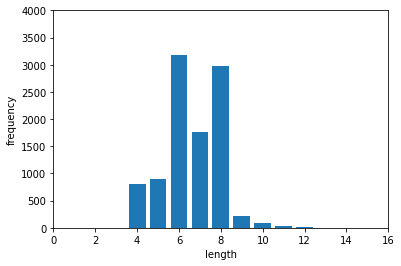

In [13]:
#plotting password length data
plt.bar(np.sort(data['length'].unique()), data.groupby('length')['length'].count().values)
plt.xlabel('length')
plt.ylabel('frequency')
plt.axis([0,16,0,4000])

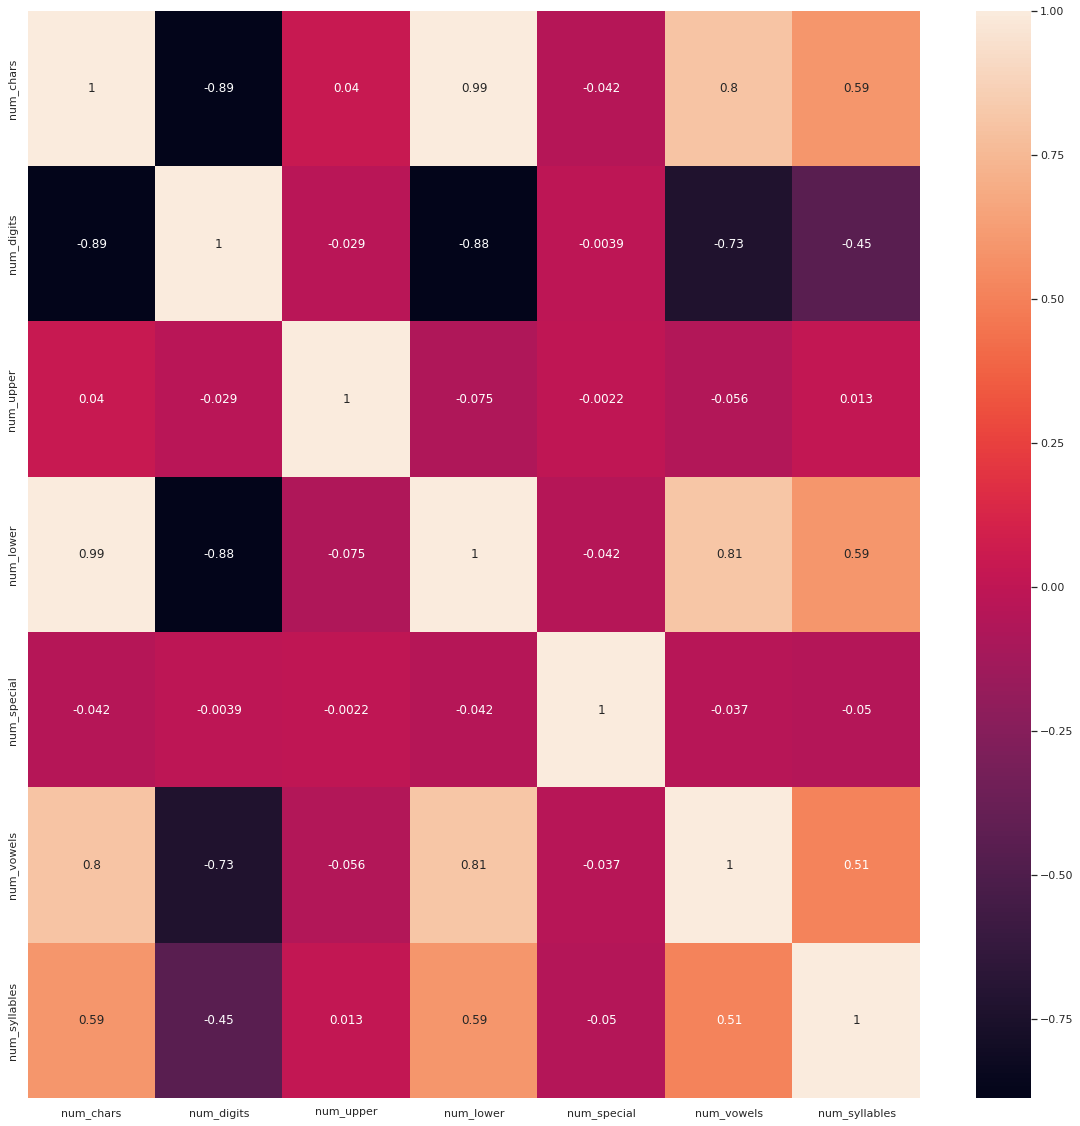

In [16]:
#Now, let's see corr.between features
plt.figure(figsize=(20,20))
sns.set(font_scale=1)
sns.heatmap(data=data[['num_chars', 'num_digits', 'num_upper',
       'num_lower', 'num_special', 'num_vowels', 'num_syllables']].corr(),annot = True)